In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# importing data, just copy + pasted from Google Sheets
liver = [21.18181818, 21.775, 22.29772727, 23.11818182, 23.69090909, 24.39090909, 24.78636364, 25.28636364, 25.65909091, 26.04090909, 26.38636364]
liversem = [0.2473790197, 0.3161892619, 0.4031864058, 0.5098440626, 0.5894420684, 0.7432207054, 0.8052397523, 0.8460321306, 0.8585112225, 0.8549489008, 0.8565332182]
potato = [21.34090909, 21.84545455, 22.01363636, 22.28636364, 22.47727273, 22.69545455, 22.75454545, 22.87727273, 22.94090909, 23.07272727, 23.13181818]
potatosem = [0.3472002486, 0.3984128291, 0.4184229025, 0.4273797876, 0.410676341, 0.4290570186, 0.4232796744, 0.4349917558, 0.4368650168, 0.4377817865, 0.442268178]
time = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]

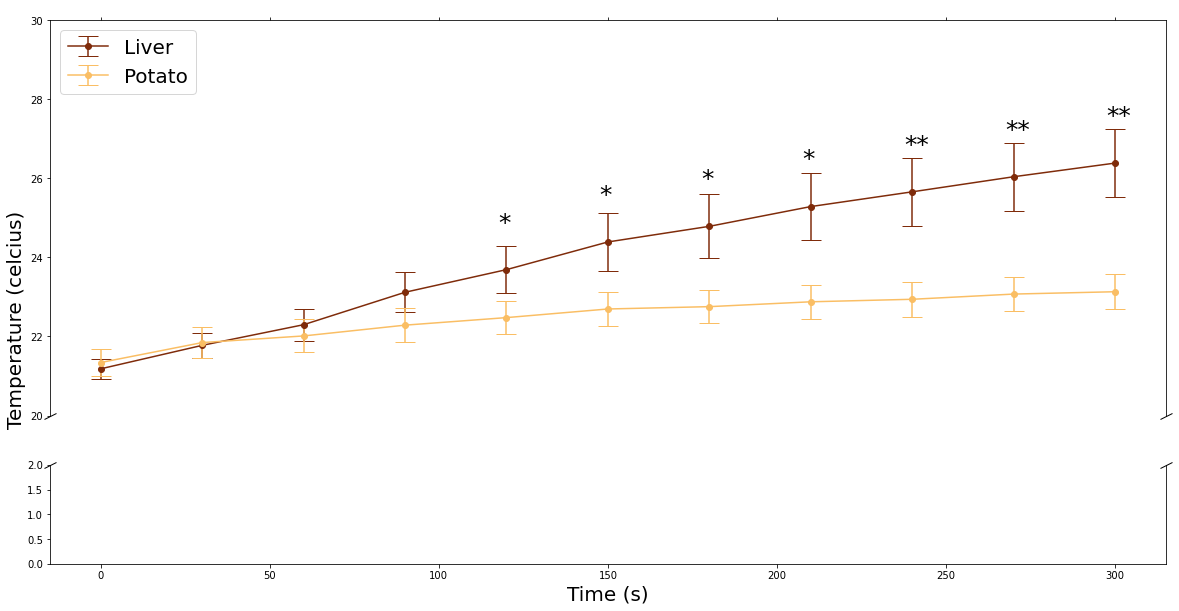

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 10), sharex = True, gridspec_kw = {"height_ratios": [4, 1]})

for ax in (ax1, ax2):

    ax.errorbar(time, liver, color = "#7F2B0A", label = "Liver", yerr = liversem, fmt = 'o-', capsize = 10)
    ax.errorbar(time, potato, color = "#fabe64", label = "Potato", yerr = potatosem, fmt = 'o-', capsize = 10)

    for i in range(len(liver)):
        output = ""
        if ((liver[i] - liversem[i]) > (potato[i] + potatosem[i])): output = "*"
        if ((liver[i] - 2 * liversem[i]) > potato[i] + 2 * potatosem[i]): output = "**"
        ax.annotate(output, xy = (time[i] - 2.5, liver[i] + 1), fontsize = 25)
        
# breaking axes, code not all mine
        
ax1.set_ylim(20, 30)
ax2.set_ylim(0, 2)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# done

plt.xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Temperature (celcius)                                ", fontsize = 20)

ax1.legend(loc = "upper left", fontsize = 20)

plt.show()